<a href="https://colab.research.google.com/github/Danjstr/DAV-6150/blob/main/Daniel_Strauss_M4_assn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**

With this dataset, we are tasked with performing a linear regression on the data. The problem is we will need to carefully perform feature selection and dimensionality reduction.
- Importing the data
- Perform Exploratory Data Analysis
-Identify any flaws with the data and fix them.
-Normalize the data
-Find the correlation of the different values and remove overly correlated data.
-Perform PCA
-Perform our linear regression with cross-validation.

In [1]:
# import dependencies
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


In [2]:
#Read data From Github
df7 = pd.read_csv('https://raw.githubusercontent.com/Danjstr/DAV-6150/main/M4_Data.csv')
df7.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


In [3]:
df7.columns = ['symboling', 'normalized-losses', 'make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

## **Exploratory Data Analysis**

For the exploratory data analysis, we have performed the following operations to derive insights from our data.

-Showed the data frame and its tail.

-Retrieved summary Statistics.

-Checked the data type and how many null values were in the data set.

-Showed the shape of the data and column labels.

-Removed all ? and filled and replaced the ? with appropriate values.

-Plotted a bar plot and histogram of all necessary columns.

The first problem with the data was the question marks that needed to be replaced.

The next problem was the outliers in the compression-ratio which needed to be addressed.

The rest of the data needed fairly little work. In addition to the overall spread of the data, we identified the number of miles per gallon by Maker and used a correlation plot to determine which columns are most highly correlated.

With the exception of the above-mentioned issues, the data is largely ready for predictive use after being normalized and having dimensionality reduction performed on it.

In [4]:
#Show The Data
df7

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [5]:
#Show the tail of the data
df7.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
203,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [6]:
#Show the description
df7.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,25.240196,30.769608
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,6.551513,6.898337
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.500000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [7]:
#Show the info
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [8]:
#Replace all ? with nan.
df7['normalized-losses'].replace('?', np.NaN)

0      NaN
1      NaN
2      164
3      164
4      NaN
      ... 
199     95
200     95
201     95
202     95
203     95
Name: normalized-losses, Length: 204, dtype: object

In [9]:
#Show the head of the data
df7.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


In [10]:
#Show the info to confrim that normalized-losses now contains null values
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [11]:
#Turn normalized-losses into a list
list=df7['normalized-losses'].to_list()

In [12]:
#Drop all nan's from list 
cleanedList = [x for x in list if str(x) != 'nan']

In [13]:
#Show the list of all normalized-losses without nan or ?


In [14]:
#Select random variables from the new list and use it to fill the normalized-losses missing values
df7['normalized-losses'] = df7['normalized-losses'].fillna(pd.Series(np.random.choice(cleanedList, size=len(df7.index))))

In [15]:
#Show the info
df7.info()
#Show the dataframe
df7

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [16]:
#Show the shape
df7.shape

(204, 26)

In [17]:
df2=df7

In [18]:
#Show the columns
df2.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [19]:
#Show the data type
df2.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [20]:
df3=df2

In [21]:
#Set size of all plots
rcParams["figure.figsize"] =25, 10

Text(0.5, 1.0, 'wheel-base')

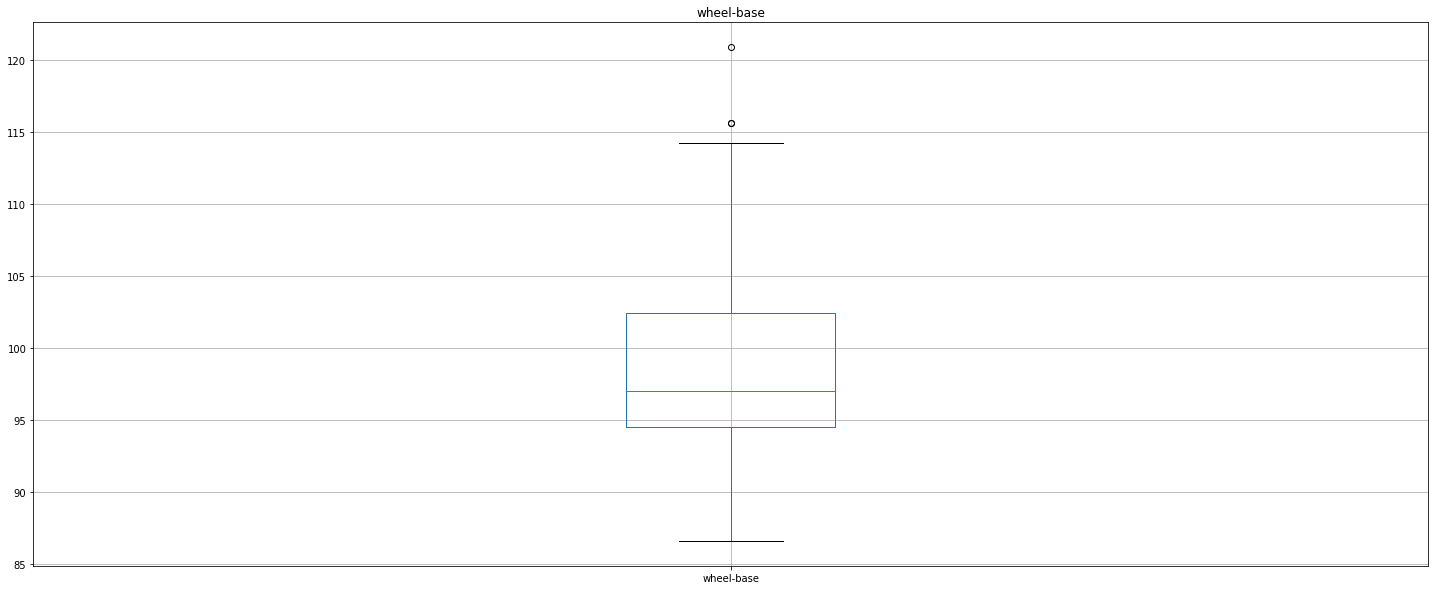

In [22]:
#Show wheel-base distribution
df3.boxplot(column=['wheel-base'], return_type='axes');
plt.title("wheel-base")



Text(0.5, 1.0, 'wheel-base')

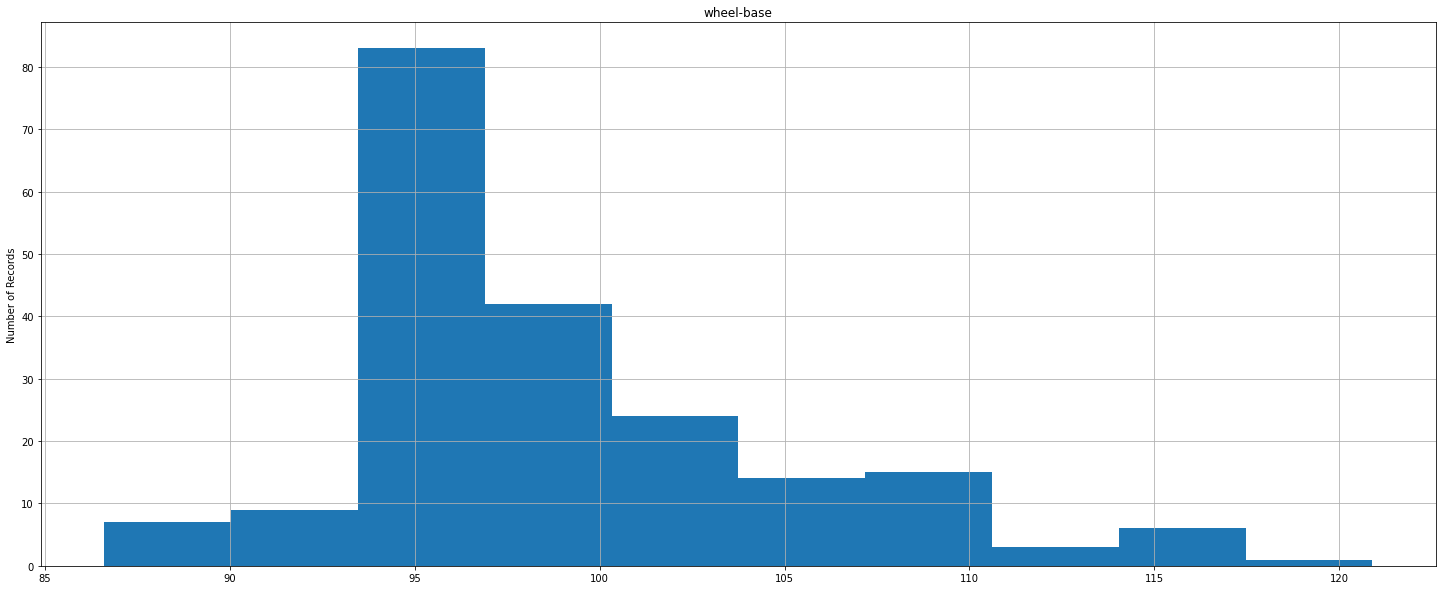

In [23]:
#Show wheel-base distribution
df3.hist(column=['wheel-base']);
plt.ylabel("Number of Records")
plt.title("wheel-base")

Text(0.5, 1.0, 'length')

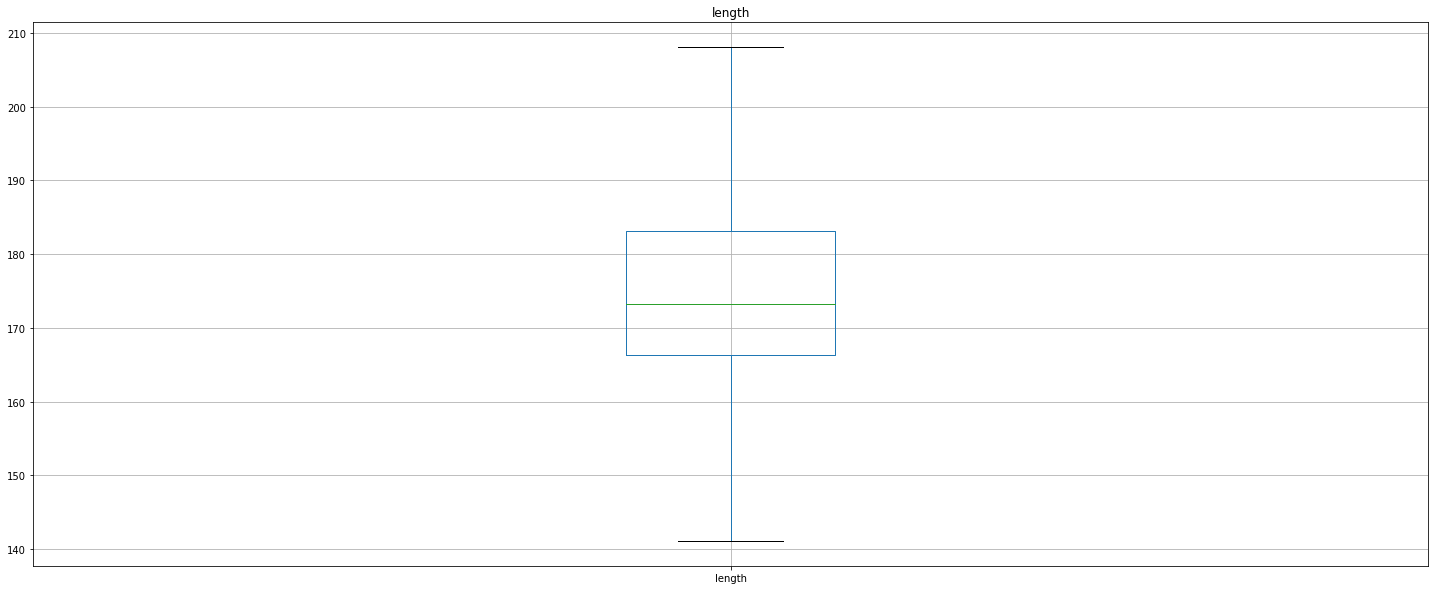

In [24]:
#Show length distribution
df3.boxplot(column=['length'], return_type='axes');
plt.title("length")



Text(0.5, 1.0, 'length')

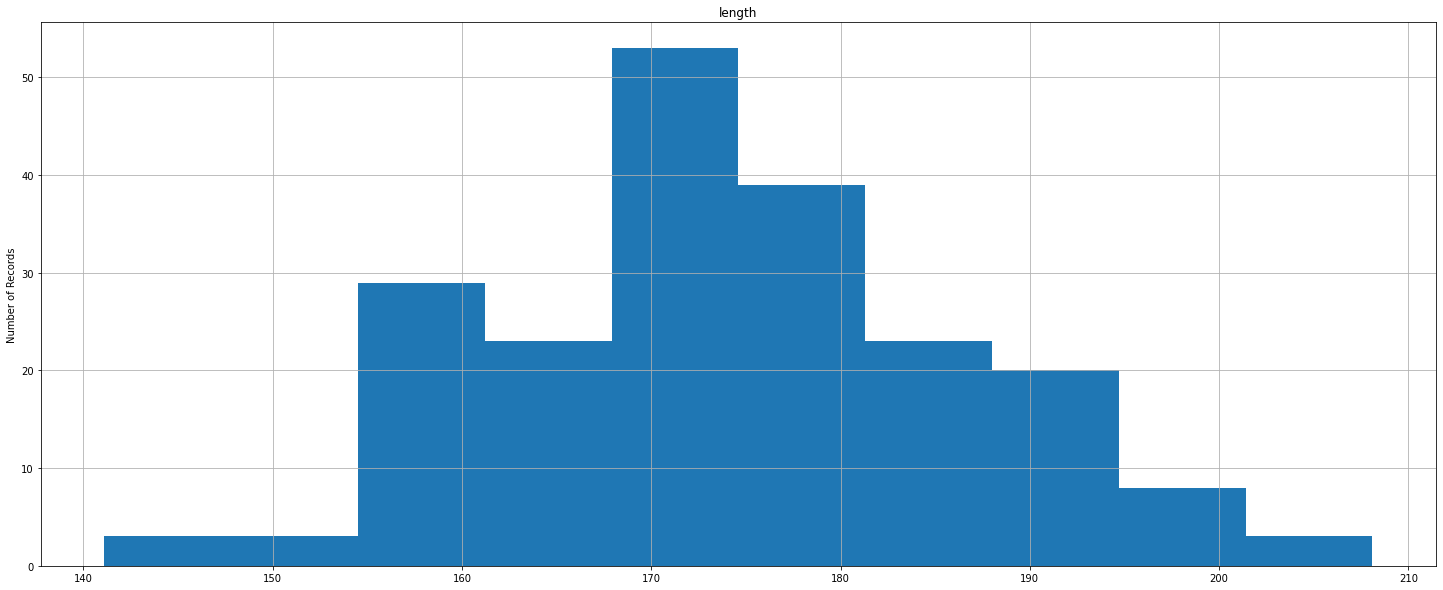

In [25]:
#Show length distribution
df3.hist(column=['length']);
plt.ylabel("Number of Records")
plt.title("length")

Text(0.5, 1.0, 'width')

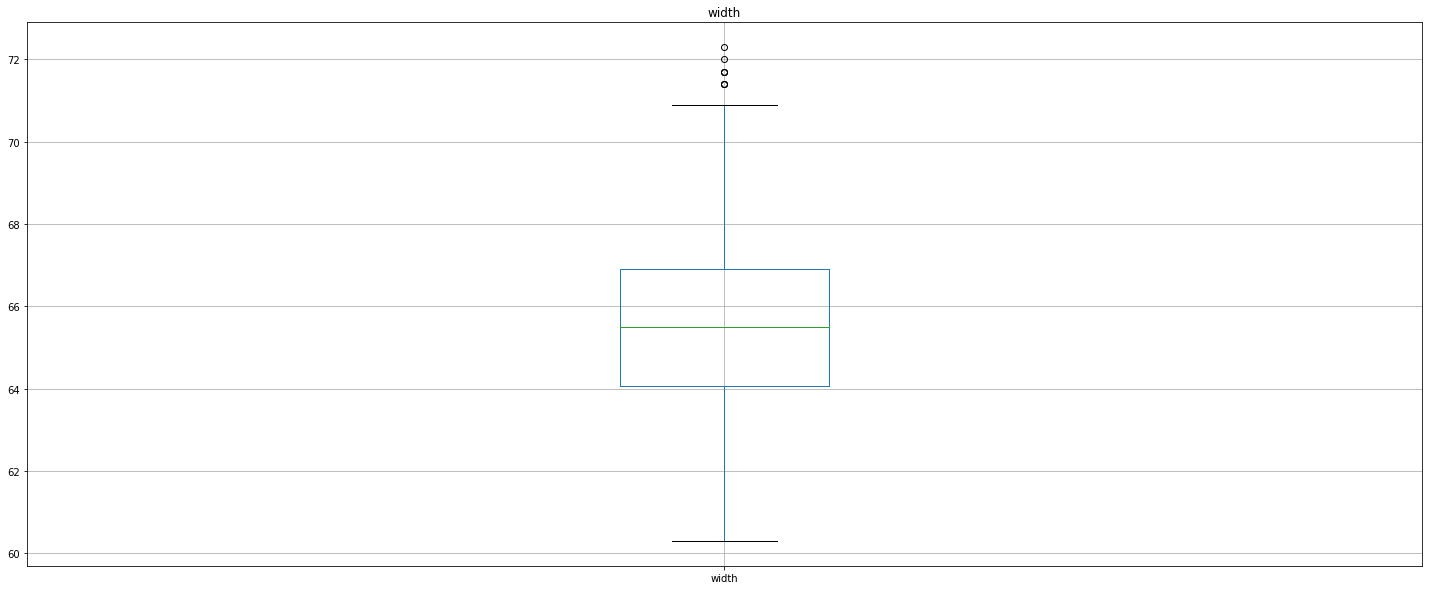

In [26]:
#Show width distribution
df3.boxplot(column=['width'], return_type='axes');
plt.title("width")



Text(0.5, 1.0, 'width')

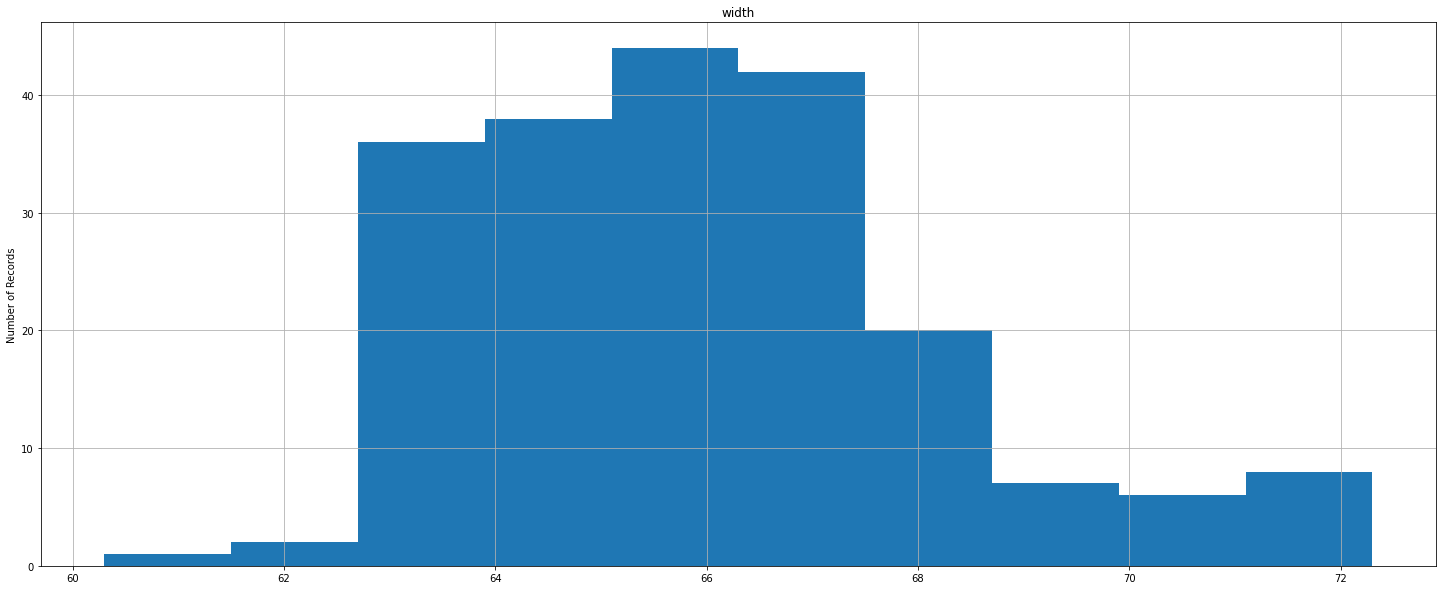

In [27]:
#Show width distribution
df3.hist(column=['width']);
plt.ylabel("Number of Records")
plt.title("width")

Text(0.5, 1.0, 'height')

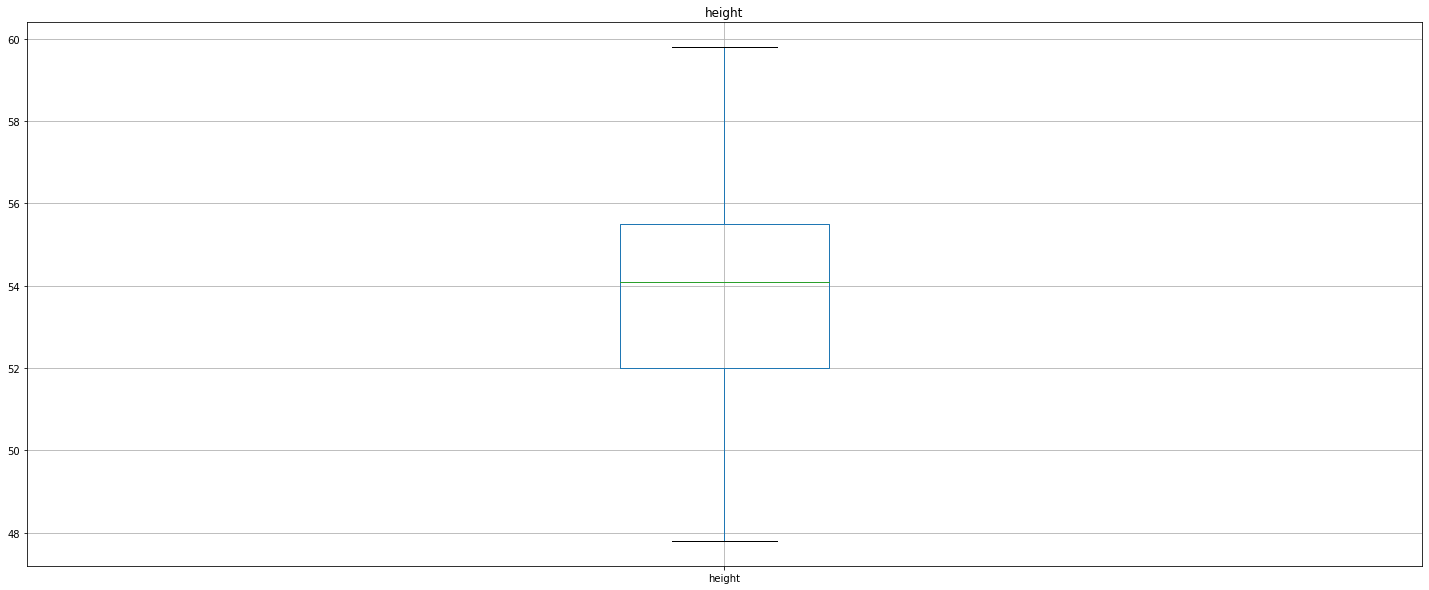

In [28]:
#Show height distribution
df3.boxplot(column=['height'], return_type='axes');
plt.title("height")



Text(0.5, 1.0, 'height')

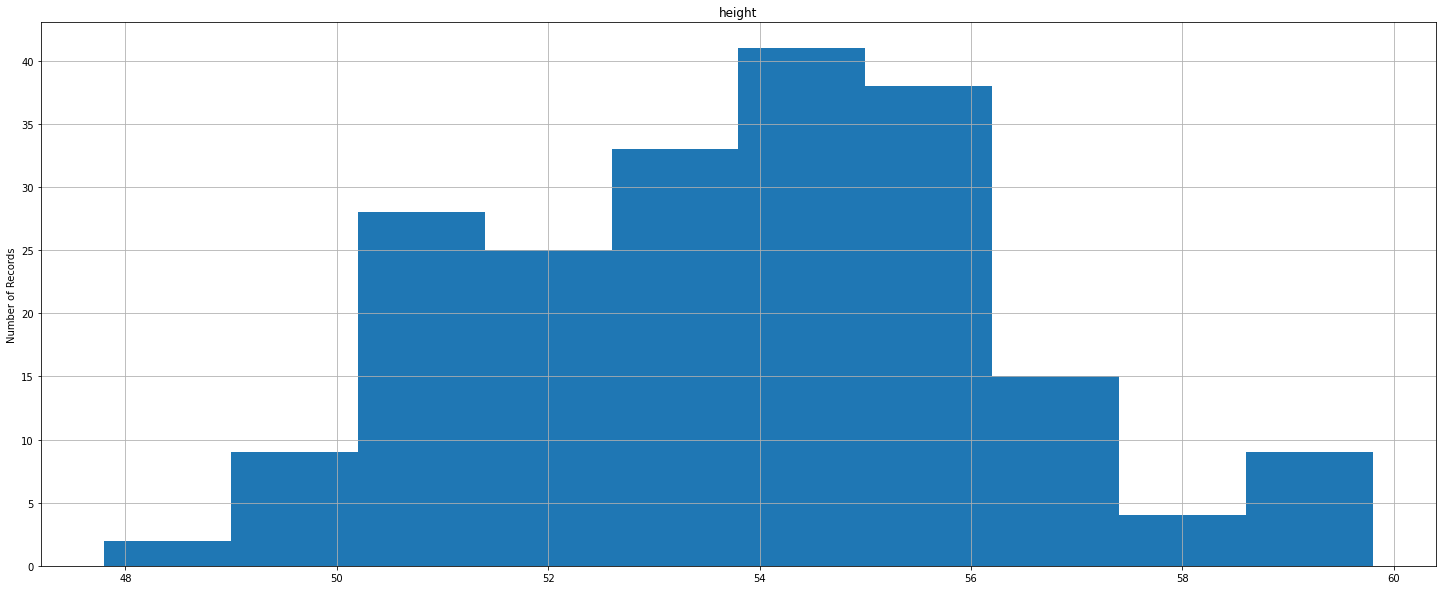

In [29]:
#Show height distribution
df3.hist(column=['height']);
plt.ylabel("Number of Records")
plt.title("height")

Text(0.5, 1.0, 'curb-weight')

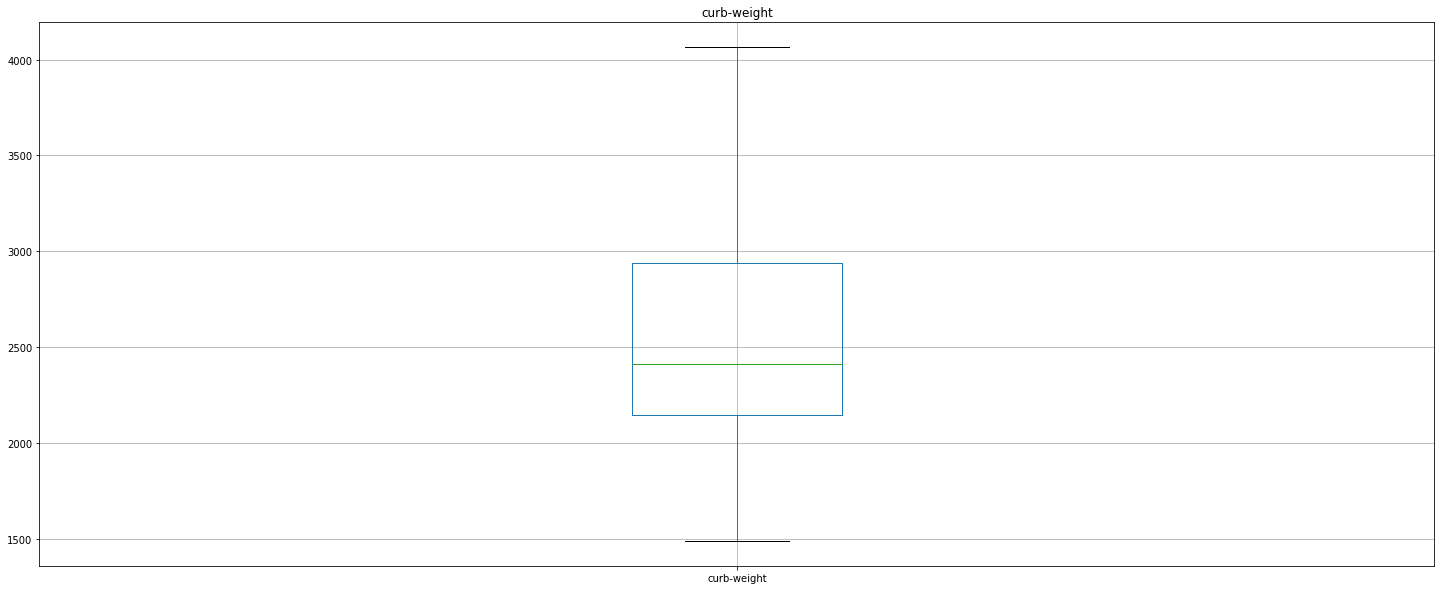

In [30]:
#Show curb-weight distribution
df3.boxplot(column=['curb-weight'], return_type='axes');
plt.title("curb-weight")



Text(0.5, 1.0, 'curb-weight')

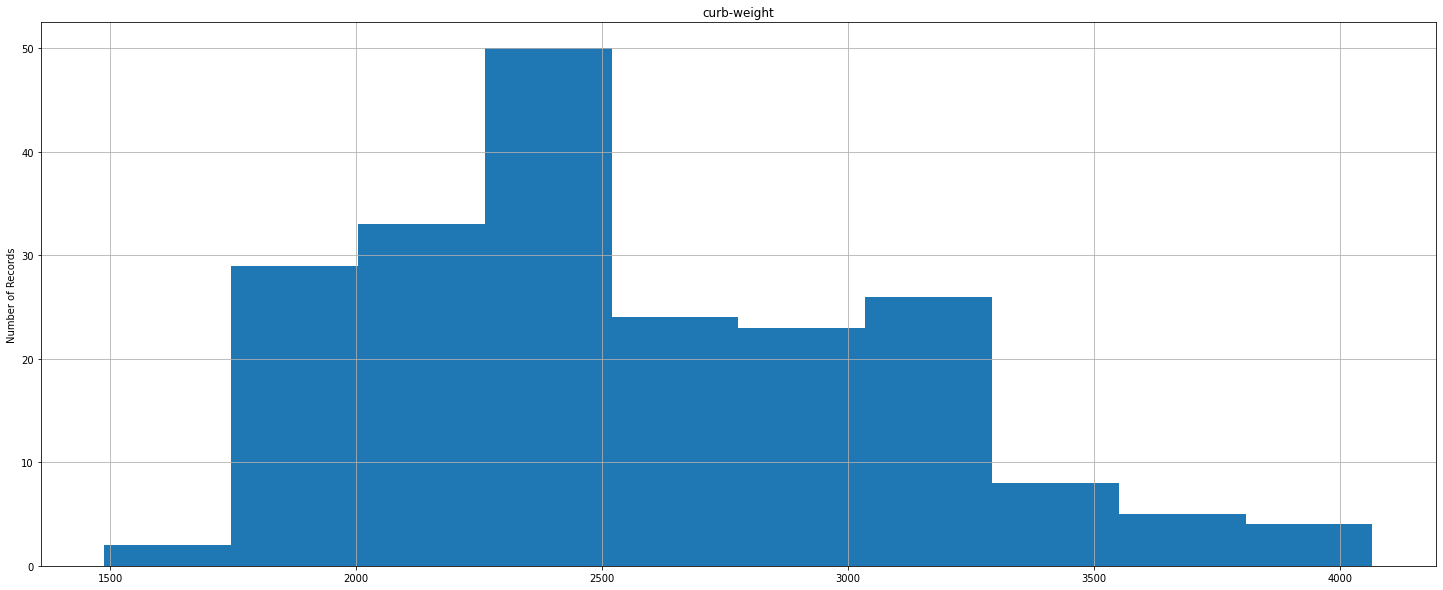

In [31]:
#Show curb-weight distribution
df3.hist(column=['curb-weight']);
plt.ylabel("Number of Records")
plt.title("curb-weight")

Text(0.5, 1.0, 'engine-size')

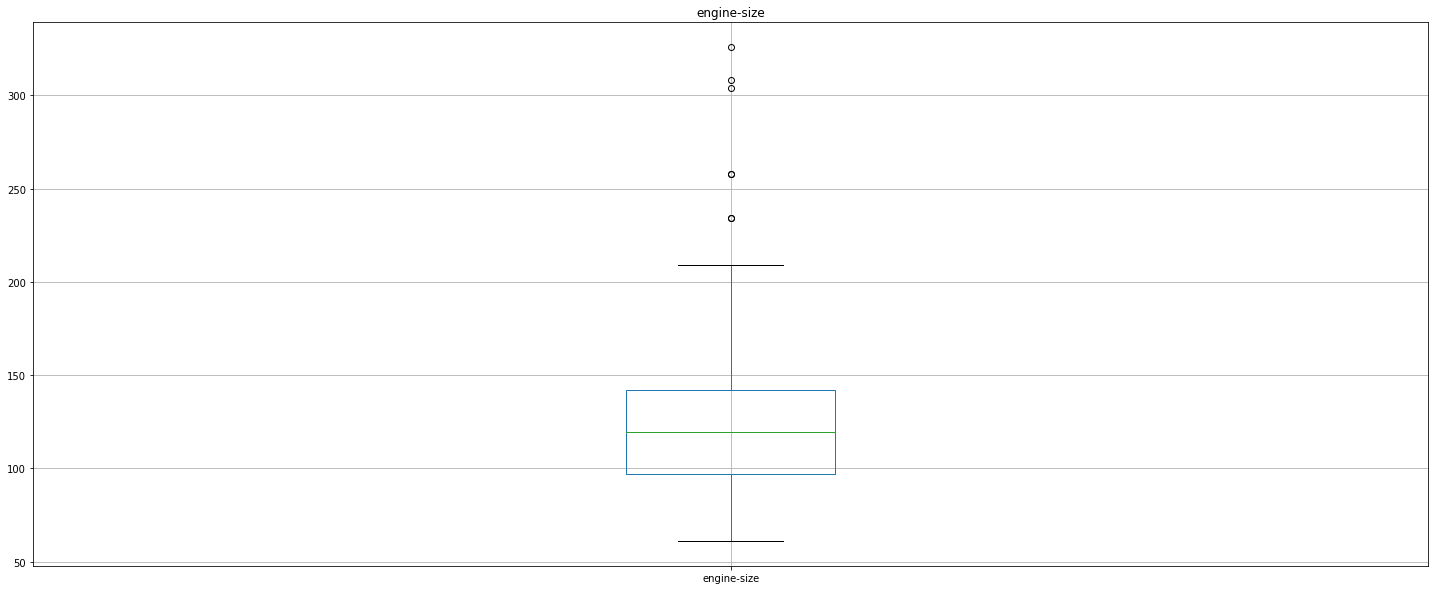

In [32]:
#Show engine-size distribution
df3.boxplot(column=['engine-size'], return_type='axes');
plt.title("engine-size")



Text(0.5, 1.0, 'engine-size')

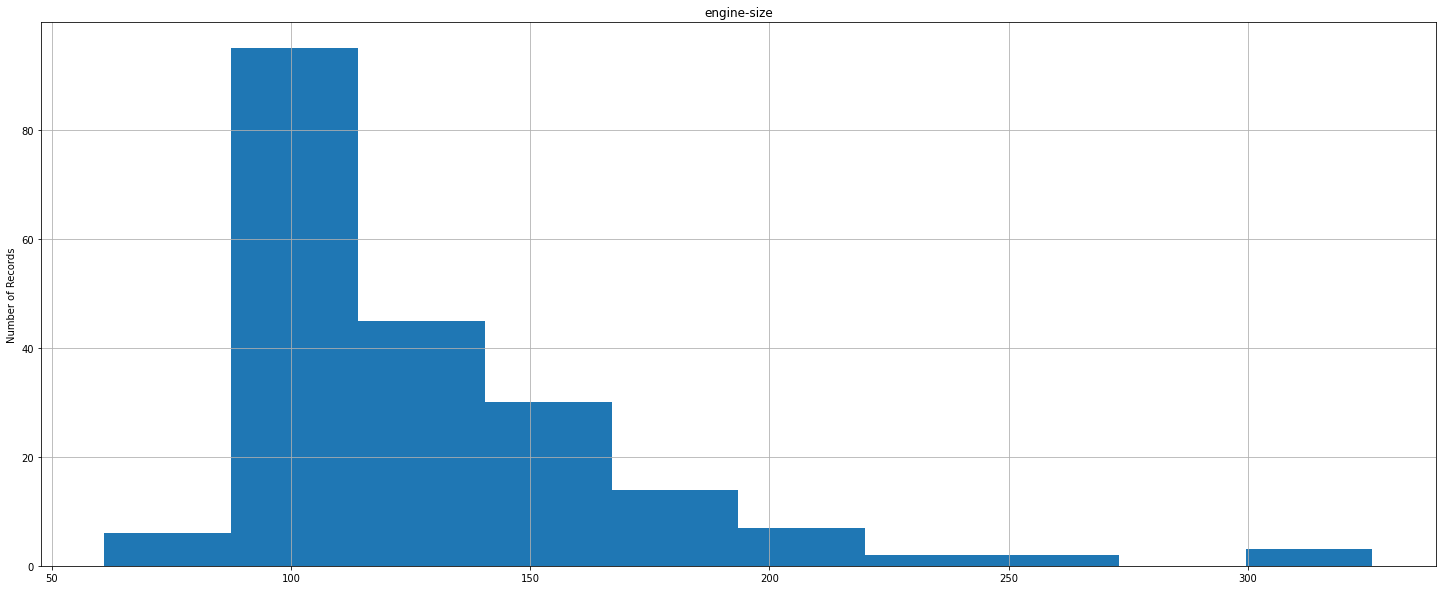

In [33]:
#Show engine-size distribution
df3.hist(column=['engine-size']);
plt.ylabel("Number of Records")
plt.title("engine-size")

Text(0.5, 1.0, 'compression-ratio')

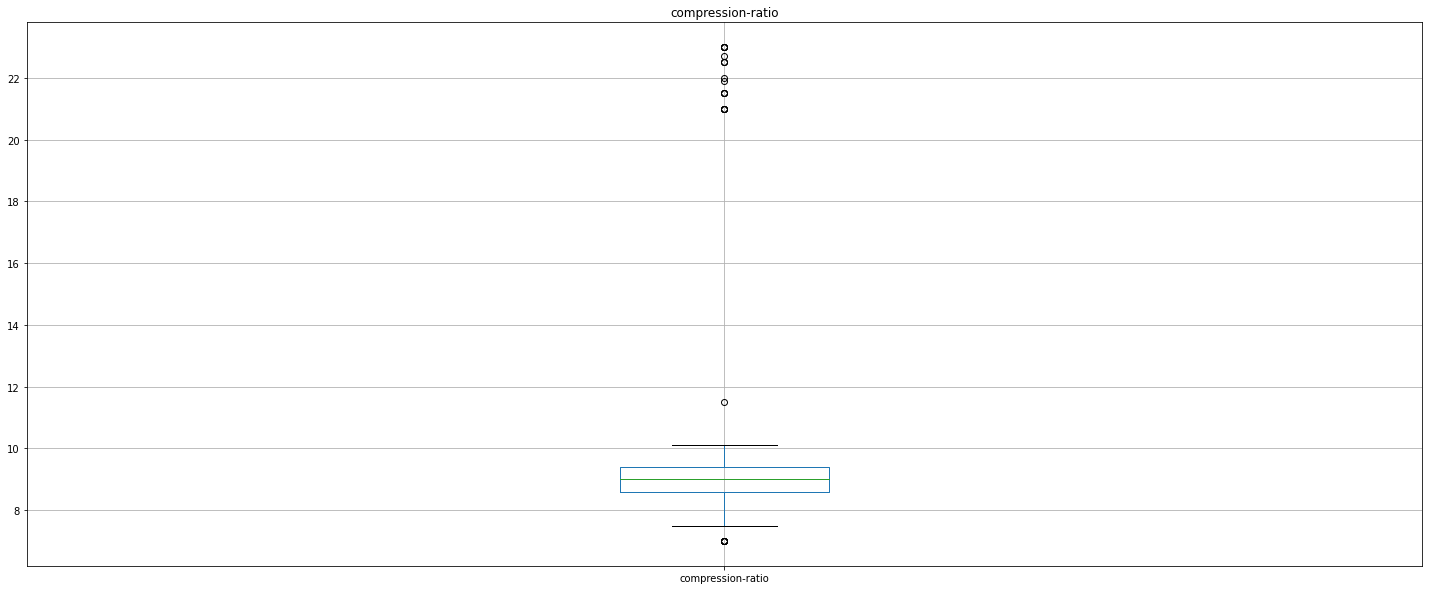

In [34]:
#Show compression-ratio distribution
df3.boxplot(column=['compression-ratio'], return_type='axes');
plt.title("compression-ratio")



Text(0.5, 1.0, 'compression-ratio')

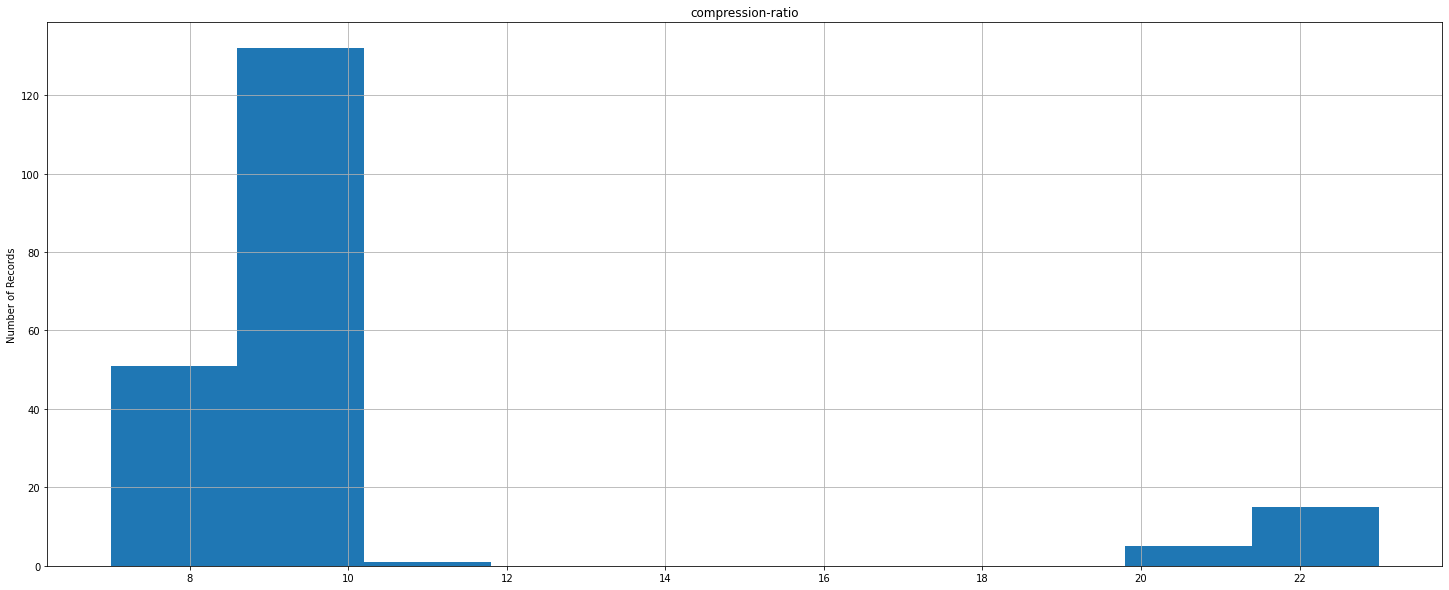

In [35]:
#Show compression-ratio distribution
df3.hist(column=['compression-ratio']);
plt.ylabel("Number of Records")
plt.title("compression-ratio")

Text(0.5, 1.0, 'city-mpg')

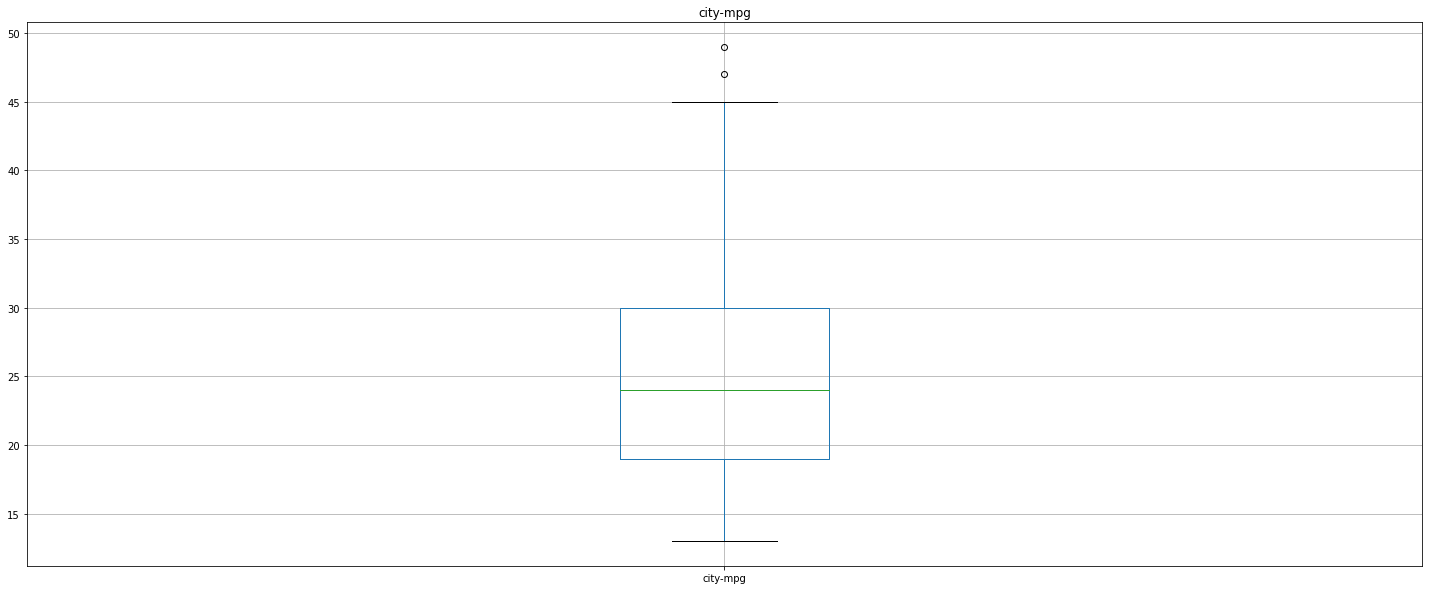

In [36]:
#Show city-mpg distribution
df3.boxplot(column=['city-mpg'], return_type='axes');
plt.title("city-mpg")



Text(0.5, 1.0, 'city-mpg')

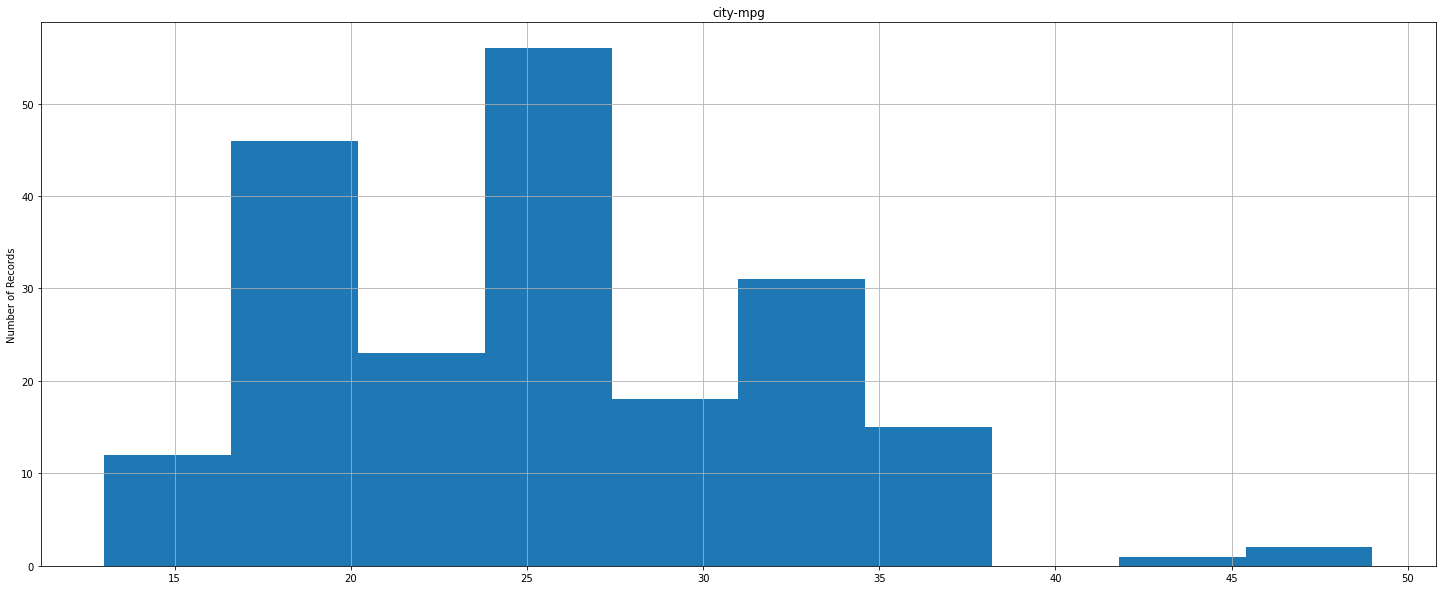

In [37]:
#Show city-mpg distribution
df3.hist(column=['city-mpg']);
plt.ylabel("Number of Records")
plt.title("city-mpg")

Text(0.5, 1.0, 'highway-mpg')

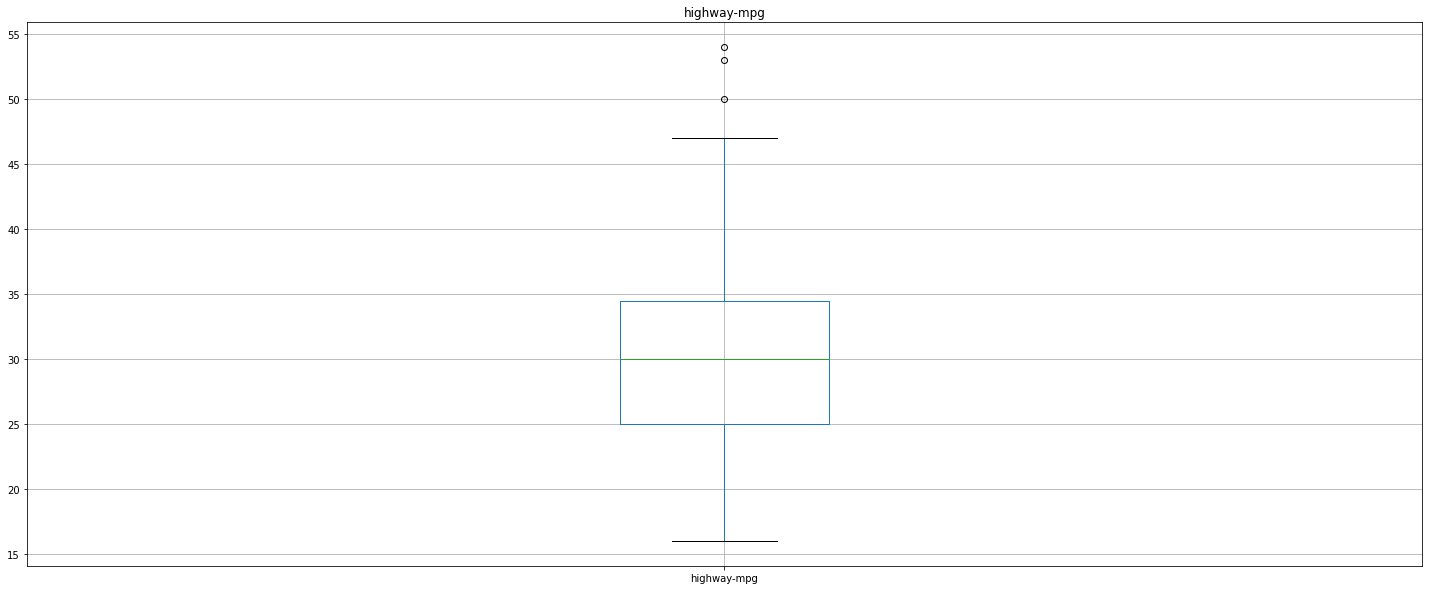

In [38]:
#Show highway-mpg distribution
df3.boxplot(column=['highway-mpg'], return_type='axes');
plt.title("highway-mpg")



Text(0.5, 1.0, 'highway-mpg')

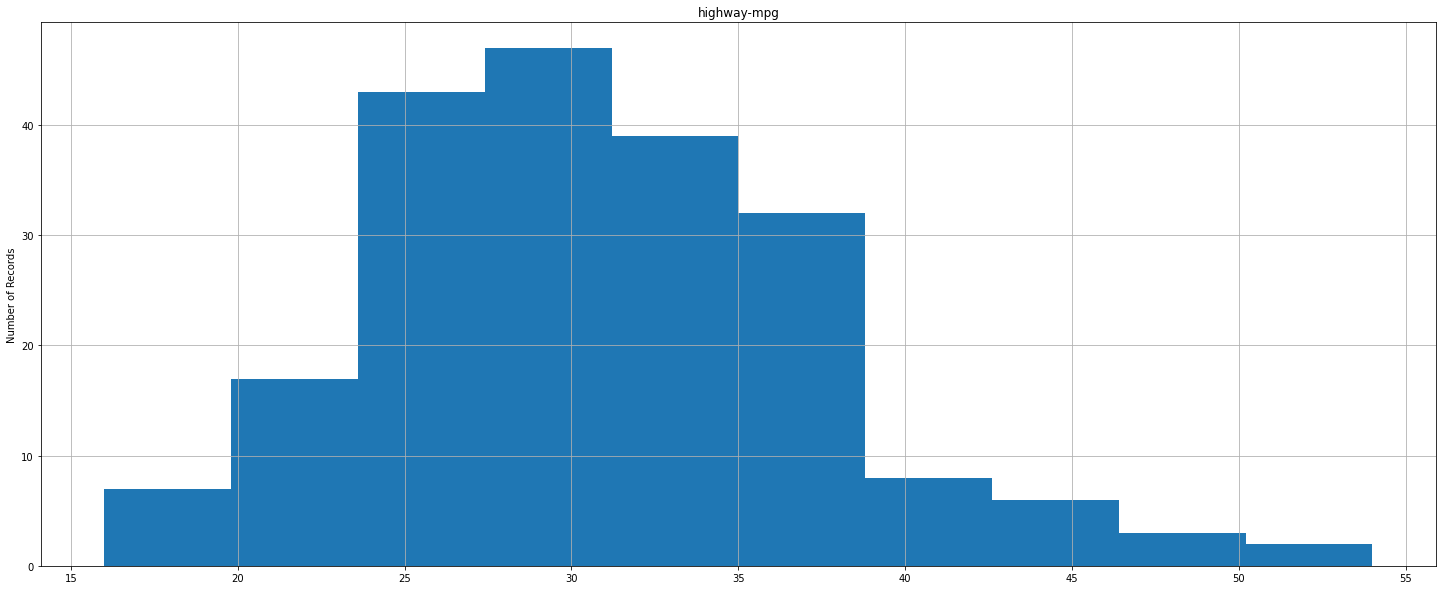

In [39]:
#Show highway-mpg distribution
df3.hist(column=['highway-mpg']);
plt.ylabel("Number of Records")
plt.title("highway-mpg")

[]

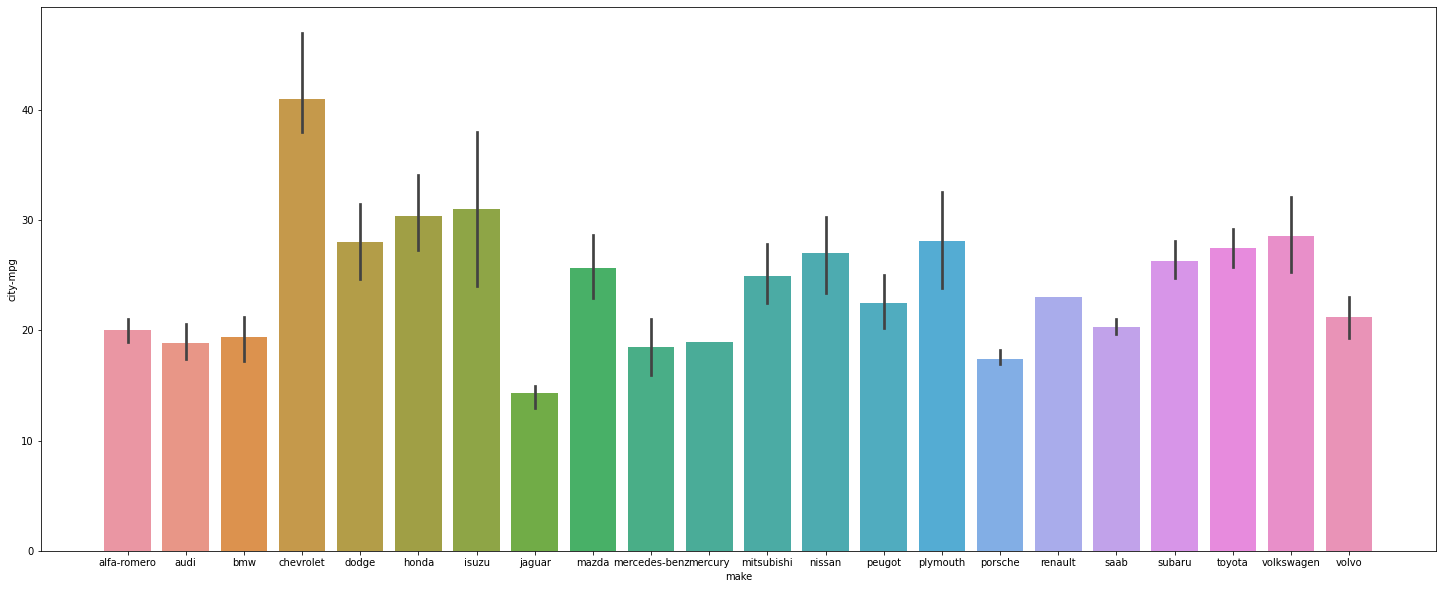

In [40]:

#Show miles per gallon my the Make of the car

sns.barplot(data=df3, y='city-mpg', x= 'make')

plt.plot()

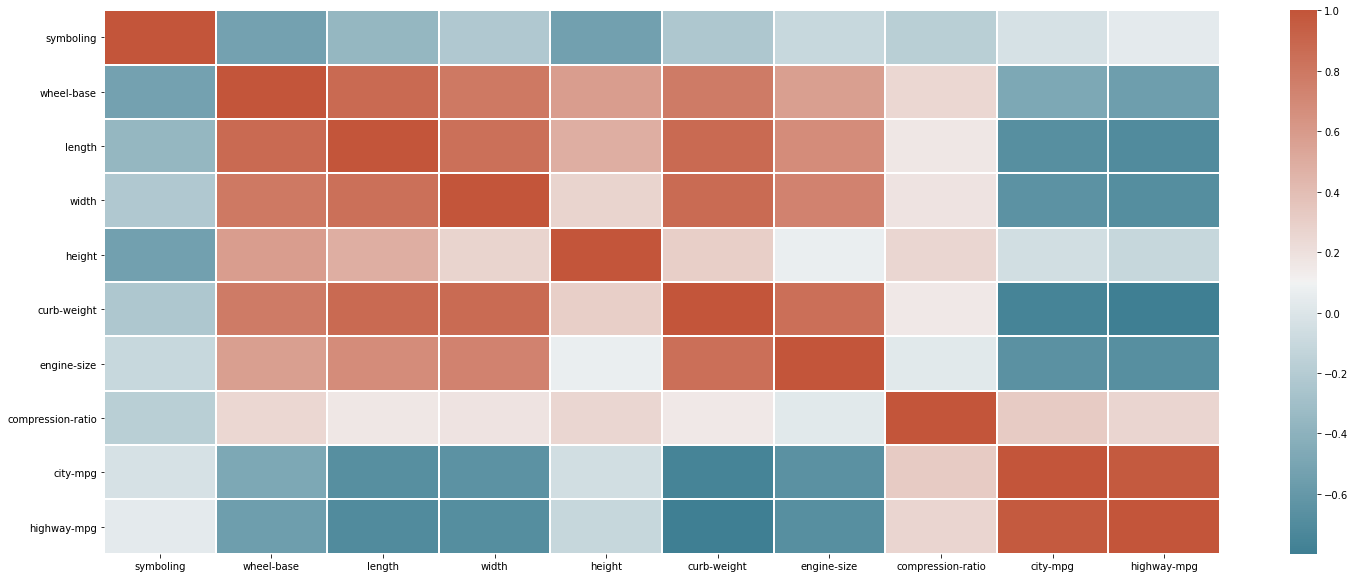

In [41]:
# plot the heatmap
corr = df3.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=1, annot=False, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [42]:
#Drop Categorical columns
df3.drop(['symboling','normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style','drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower' , 'peak-rpm' ,'price'], axis = 1, inplace = True) 


In [43]:
#Drop the outliers from Compression-ratio by removing any rows with values more than 2.5 times the standard deviation from the mean
df3=df3[(np.abs(stats.zscore(df3)) < 2.5).all(axis=1)]

Text(0.5, 1.0, 'compression-ratio')

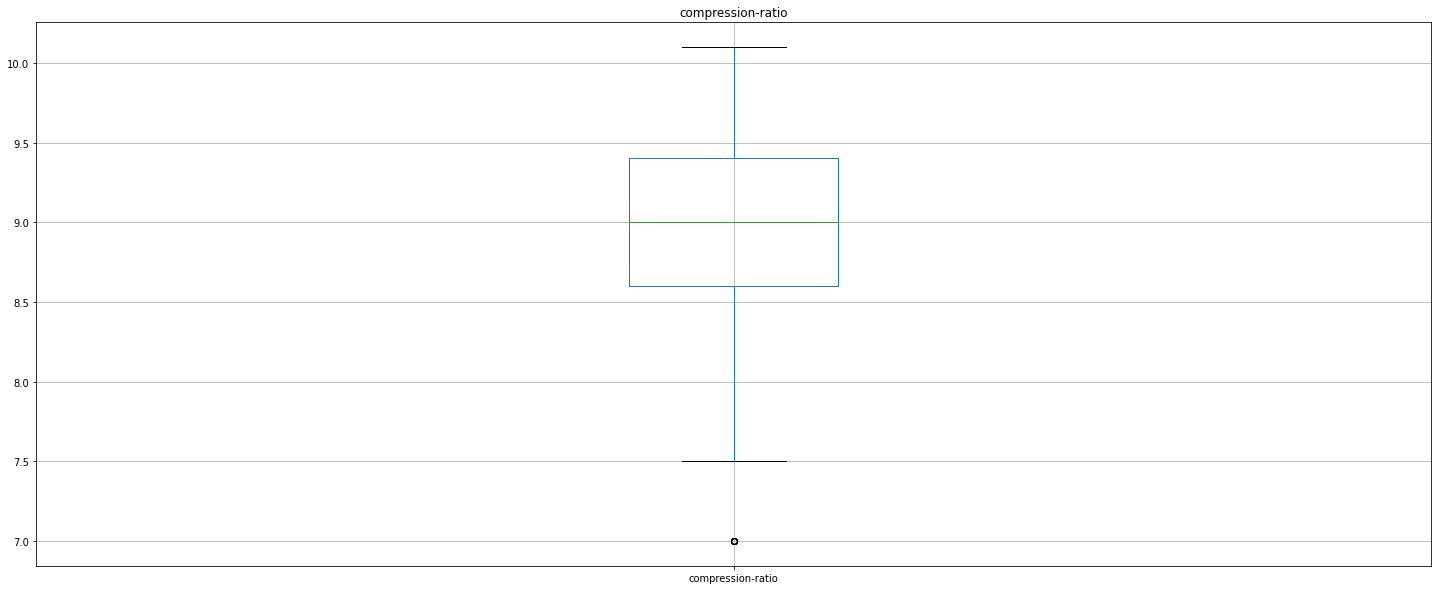

In [44]:
#Show compression-ratio distribution
df3.boxplot(column=['compression-ratio'], return_type='axes');
plt.title("compression-ratio")



Text(0.5, 1.0, 'compression-ratio')

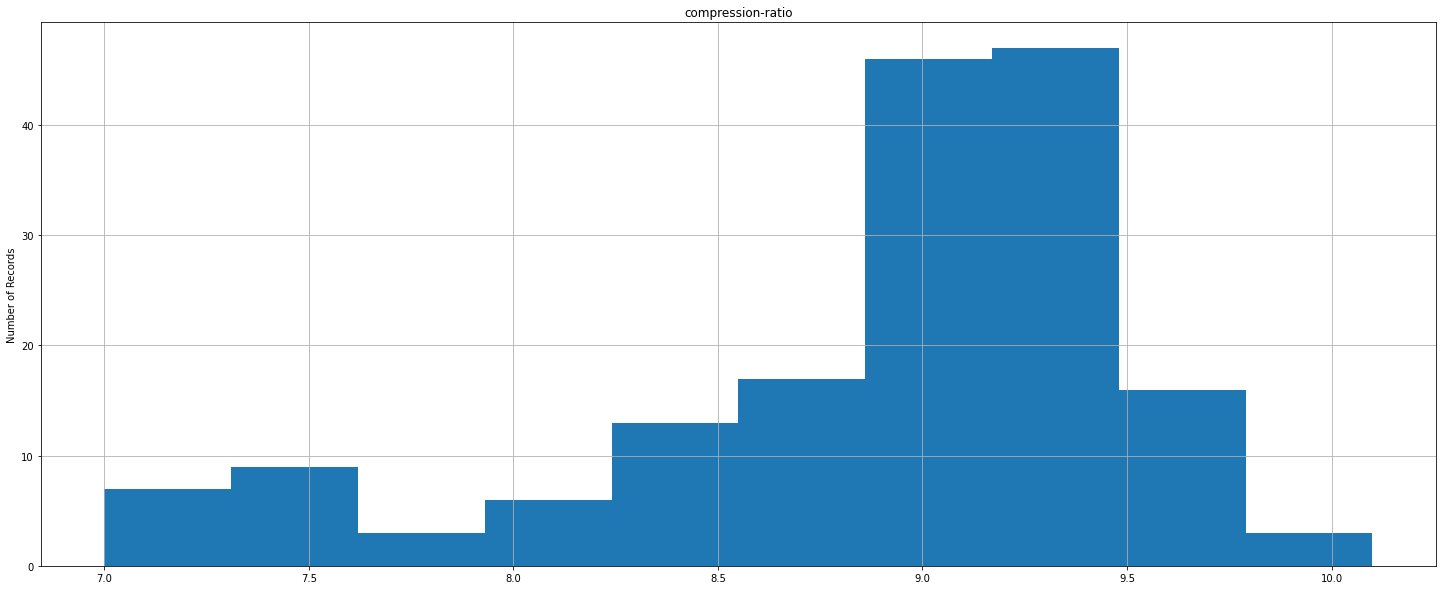

In [45]:
#Show compression-ratio distribution
df3.hist(column=['compression-ratio']);
plt.ylabel("Number of Records")
plt.title("compression-ratio")

In [46]:
df3

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
3,99.4,176.6,66.4,54.3,2824,136,8.0,18,22
4,99.8,177.3,66.3,53.1,2507,136,8.5,19,25
...,...,...,...,...,...,...,...,...,...
198,104.3,188.8,67.2,57.5,3157,130,7.5,17,22
199,109.1,188.8,68.9,55.5,2952,141,9.5,23,28
200,109.1,188.8,68.8,55.5,3049,141,8.7,19,25
201,109.1,188.8,68.9,55.5,3012,173,8.8,18,23


## **Feature Selection / Dimensionality Reduction**

For the Feature Feature Selection and dimensinality reduction I followed the bellow steps.

-Isolated the numerical components as categorical values are not useful or this model. 

-Normalized the numerical components with a MinMaxScaler.

-Reduced the number of highly correlated features. We discovered that highway-mpg was overly corelated so it was dropped.

-Performed Principal component analysis. We performed and showed our principal componnet analysis in a graph.

-Finally we showed all PCA Components

In [47]:
#Show the head of the data
df3.head()

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
3,99.4,176.6,66.4,54.3,2824,136,8.0,18,22
4,99.8,177.3,66.3,53.1,2507,136,8.5,19,25


In [48]:


# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df3 = pd.DataFrame(scaler.fit_transform(df3))

df3

,0,1,2,3,4,5,6,7,8
0,0.085470,0.461832,0.252747,0.000000,0.432384,0.431655,0.645161,0.260870,0.259259
1,0.337607,0.507634,0.406593,0.349515,0.595492,0.589928,0.645161,0.173913,0.222222
2,0.564103,0.610687,0.483516,0.533981,0.307236,0.280576,0.967742,0.391304,0.370370
3,0.547009,0.610687,0.505495,0.533981,0.596085,0.474820,0.322581,0.130435,0.074074
4,0.564103,0.624046,0.494505,0.417476,0.408066,0.474820,0.483871,0.173913,0.185185
...,...,...,...,...,...,...,...,...,...
162,0.756410,0.843511,0.593407,0.844660,0.793594,0.431655,0.161290,0.086957,0.074074
163,0.961538,0.843511,0.780220,0.650485,0.672005,0.510791,0.806452,0.347826,0.296296
164,0.961538,0.843511,0.769231,0.650485,0.729537,0.510791,0.548387,0.173913,0.185185
165,0.961538,0.843511,0.780220,0.650485,0.707592,0.741007,0.580645,0.130435,0.111111


In [49]:
#Rename the columns
df3.columns =['wheel-base','length','width',	'height',	'curb-weight',	'engine-size',	'compression-ratio',	'city-mpg',	'highway-mpg']

In [50]:
df3.head()

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,0.085470,0.461832,0.252747,0.000000,0.432384,0.431655,0.645161,0.260870,0.259259
1,0.337607,0.507634,0.406593,0.349515,0.595492,0.589928,0.645161,0.173913,0.222222
2,0.564103,0.610687,0.483516,0.533981,0.307236,0.280576,0.967742,0.391304,0.370370
3,0.547009,0.610687,0.505495,0.533981,0.596085,0.474820,0.322581,0.130435,0.074074
4,0.564103,0.624046,0.494505,0.417476,0.408066,0.474820,0.483871,0.173913,0.185185


In [51]:
# Create correlation matrix
cor_matrix = df3.corr().abs()
print(cor_matrix)


                   wheel-base    length  ...  city-mpg  highway-mpg
wheel-base           1.000000  0.816027  ...  0.471324     0.505674
length               0.816027  1.000000  ...  0.701561     0.696396
width                0.765380  0.811689  ...  0.710136     0.708389
height               0.548625  0.463424  ...  0.076650     0.116759
curb-weight          0.669954  0.843486  ...  0.855570     0.860107
engine-size          0.443285  0.650561  ...  0.699517     0.678714
compression-ratio    0.182104  0.206088  ...  0.441699     0.449709
city-mpg             0.471324  0.701561  ...  1.000000     0.973985
highway-mpg          0.505674  0.696396  ...  0.973985     1.000000

[9 rows x 9 columns]


In [52]:
# Select upper triangle of correlation matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)


                   wheel-base    length  ...  city-mpg  highway-mpg
wheel-base                NaN  0.816027  ...  0.471324     0.505674
length                    NaN       NaN  ...  0.701561     0.696396
width                     NaN       NaN  ...  0.710136     0.708389
height                    NaN       NaN  ...  0.076650     0.116759
curb-weight               NaN       NaN  ...  0.855570     0.860107
engine-size               NaN       NaN  ...  0.699517     0.678714
compression-ratio         NaN       NaN  ...  0.441699     0.449709
city-mpg                  NaN       NaN  ...       NaN     0.973985
highway-mpg               NaN       NaN  ...       NaN          NaN

[9 rows x 9 columns]


In [53]:
# Find features with correlation greater than 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['highway-mpg']


In [54]:
# Drop features 
df3.drop(to_drop, axis=1, inplace=True)

In [55]:
df3

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg
0,0.085470,0.461832,0.252747,0.000000,0.432384,0.431655,0.645161,0.260870
1,0.337607,0.507634,0.406593,0.349515,0.595492,0.589928,0.645161,0.173913
2,0.564103,0.610687,0.483516,0.533981,0.307236,0.280576,0.967742,0.391304
3,0.547009,0.610687,0.505495,0.533981,0.596085,0.474820,0.322581,0.130435
4,0.564103,0.624046,0.494505,0.417476,0.408066,0.474820,0.483871,0.173913
...,...,...,...,...,...,...,...,...
162,0.756410,0.843511,0.593407,0.844660,0.793594,0.431655,0.161290,0.086957
163,0.961538,0.843511,0.780220,0.650485,0.672005,0.510791,0.806452,0.347826
164,0.961538,0.843511,0.769231,0.650485,0.729537,0.510791,0.548387,0.173913
165,0.961538,0.843511,0.780220,0.650485,0.707592,0.741007,0.580645,0.130435


In [56]:

pca = PCA(n_components=2)
pca.fit(df3)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [57]:
x_pca = pca.transform(df3)

In [58]:
df3.shape

(167, 8)

In [59]:
x_pca.shape

(167, 2)

Text(0, 0.5, 'Second Principal Component')

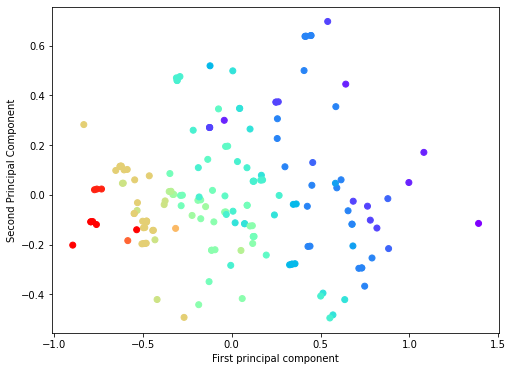

In [60]:
#Show the visualization of the 205 samples along the two principle component axis.
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df3['city-mpg'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [61]:
#Show the PCA Components
pca.components_

array([[ 0.30110147,  0.38119616,  0.31674275,  0.15500609,  0.50334727,
         0.37798986, -0.18845814, -0.45598602],
       [-0.34082178, -0.21594821, -0.03575268, -0.72363902,  0.05080103,
         0.17708739, -0.43945896, -0.2919081 ]])

In [62]:
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## **Regression Model Evaluation**

We set up our linear regression using all our prepared data.

-We saved 'city-mpg' as y as it is our response variable

-We saved df3 as X as it and all the columns in it are being used to train the linear regression.

-separate our data with train test split and fit the model.

-We performed our linear regression with cross-validation. We received a Mean score of 0.709 across our 10 fold cross-validation.

-We get our predictions from y_pred our cross-validation scores and the mean of our cross-validation scores.

-We can safely say seventy percent of the variance in the response variable can be explained by the explanatory variables.



In [63]:
# Set Response variable Energy Output as Y
y = df3[['city-mpg']]

In [64]:
X=df3

In [65]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

In [66]:
# 'wheel-base','length','width',	'height',	'curb-weight',	'engine-size',	'compression-ratio' are explanatory varaibles
X_train = X_train[['wheel-base','length','width',	'height',	'curb-weight',	'engine-size',	'compression-ratio']]
X_test = X_test[['wheel-base','length','width',	'height',	'curb-weight',	'engine-size',	'compression-ratio']]

# Fit Model
model = LinearRegression().fit(X_train,y_train)


In [67]:
# predict
y_pred = model.predict(X_test)
print(y_pred)

[[0.09556303]
 [0.71705103]
 [0.49735886]
 [0.6094124 ]
 [0.42667009]
 [0.64459819]
 [0.74429331]
 [0.28064615]
 [0.69012242]
 [0.70502527]
 [0.32834662]
 [0.46056653]
 [0.21122529]
 [0.28977563]
 [0.28232372]
 [0.42999496]
 [0.37060234]
 [0.73567826]
 [0.21387987]
 [0.17964457]
 [0.42667009]
 [0.58125513]
 [0.45980807]
 [0.38972872]
 [0.78936184]
 [0.7469675 ]
 [0.7217024 ]
 [0.04472329]
 [0.26002911]
 [0.16962364]
 [0.6167504 ]
 [0.30728003]
 [0.54210706]
 [0.4895811 ]
 [0.69860762]
 [0.24154682]
 [0.31059519]
 [0.07924846]
 [0.24478205]
 [0.76687028]
 [0.40183377]
 [0.48464438]]


In [68]:
model = LinearRegression()

#cross validation score for 10 folds.
scores = cross_val_score(model, X_train, y_train, cv=10)
print(scores)

[0.79046732 0.93286382 0.70899024 0.34068613 0.90504083 0.72113029
 0.69066077 0.69505022 0.64996599 0.65916952]


In [69]:
#Find the mean of our ten folds
np.mean(scores)

0.709402512797549

## **Conclusion**

Overall this dataset was relatively easy to work with. With the exception of the ? marks in normalized-losses and the outliers in compression-ratio there was not much data cleaning to be done.

The feature selection was a little more involved it required that the data be normalized which I opted to do with a MinMaxScaler. Then we needed to drop data that was overly correlated. As such we dropped highway-mpg as it was over 95% correlated.

Next, we performed principal component analysis and showed the results in a graph colored by miles per gallon.
Finally, we performed our linear regression and discovered that seventy percent of the variance in the response variable could be explained by the explanatory variables.